# Exploring NFC signal recordings

In [2]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

from signal_processing import complex_to_mag, shift_down, binary_slicer

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

## File naming

Describe the file names and what they tell us...

- nfc as extension
- specify sample rate, usb standard, antenna, bandwidth, length... ?

In [7]:
PATH = "../data/archives/airspy"

In [24]:
files = [file for file in os.listdir(PATH) if file.endswith(".nfc") and "tag" in file and "tag10" not in file]
files.sort()
files.append("reader1-reader2.nfc")
print(len(files), files)

16 ['tag1-2.4M-1.nfc', 'tag1-2.4M-17.1k-1.nfc', 'tag1-2M-1.nfc', 'tag1-2M-13.558M-0-16-16-2.nfc', 'tag1-2M-13.558M-0-16-16.nfc', 'tag1-2M-13.558M-1.nfc', 'tag1-2M-13.562M-0-16-16.nfc', 'tag1-2M-17.1k-0-16-16.nfc', 'tag1-2M-17.1k.nfc', 'tag1-2M-2.nfc', 'tag1-847.5k-1.nfc', 'tag1-847.5k-17.1k-1.nfc', 'tag1-reader2.nfc', 'tag2-2M-1.nfc', 'tag3-2M-1.nfc', 'reader1-reader2.nfc']


## Parse file

To parse the file, several element must be taken into account. First, the type of the data in the binary file. Here, we recorded our data as `complex64` values, so we must read them as such as well.

Second, the same sample rate used to record the signal must be used here as well.

In [12]:
samp_rate = int(768e3)
nfft = 1024

In [25]:
signals = []

for file in files:
    signal = np.fromfile(os.path.join(PATH, file), dtype=scipy.complex64)
    name = file[:-4]
    signals.append((name, signal))

## Visualize

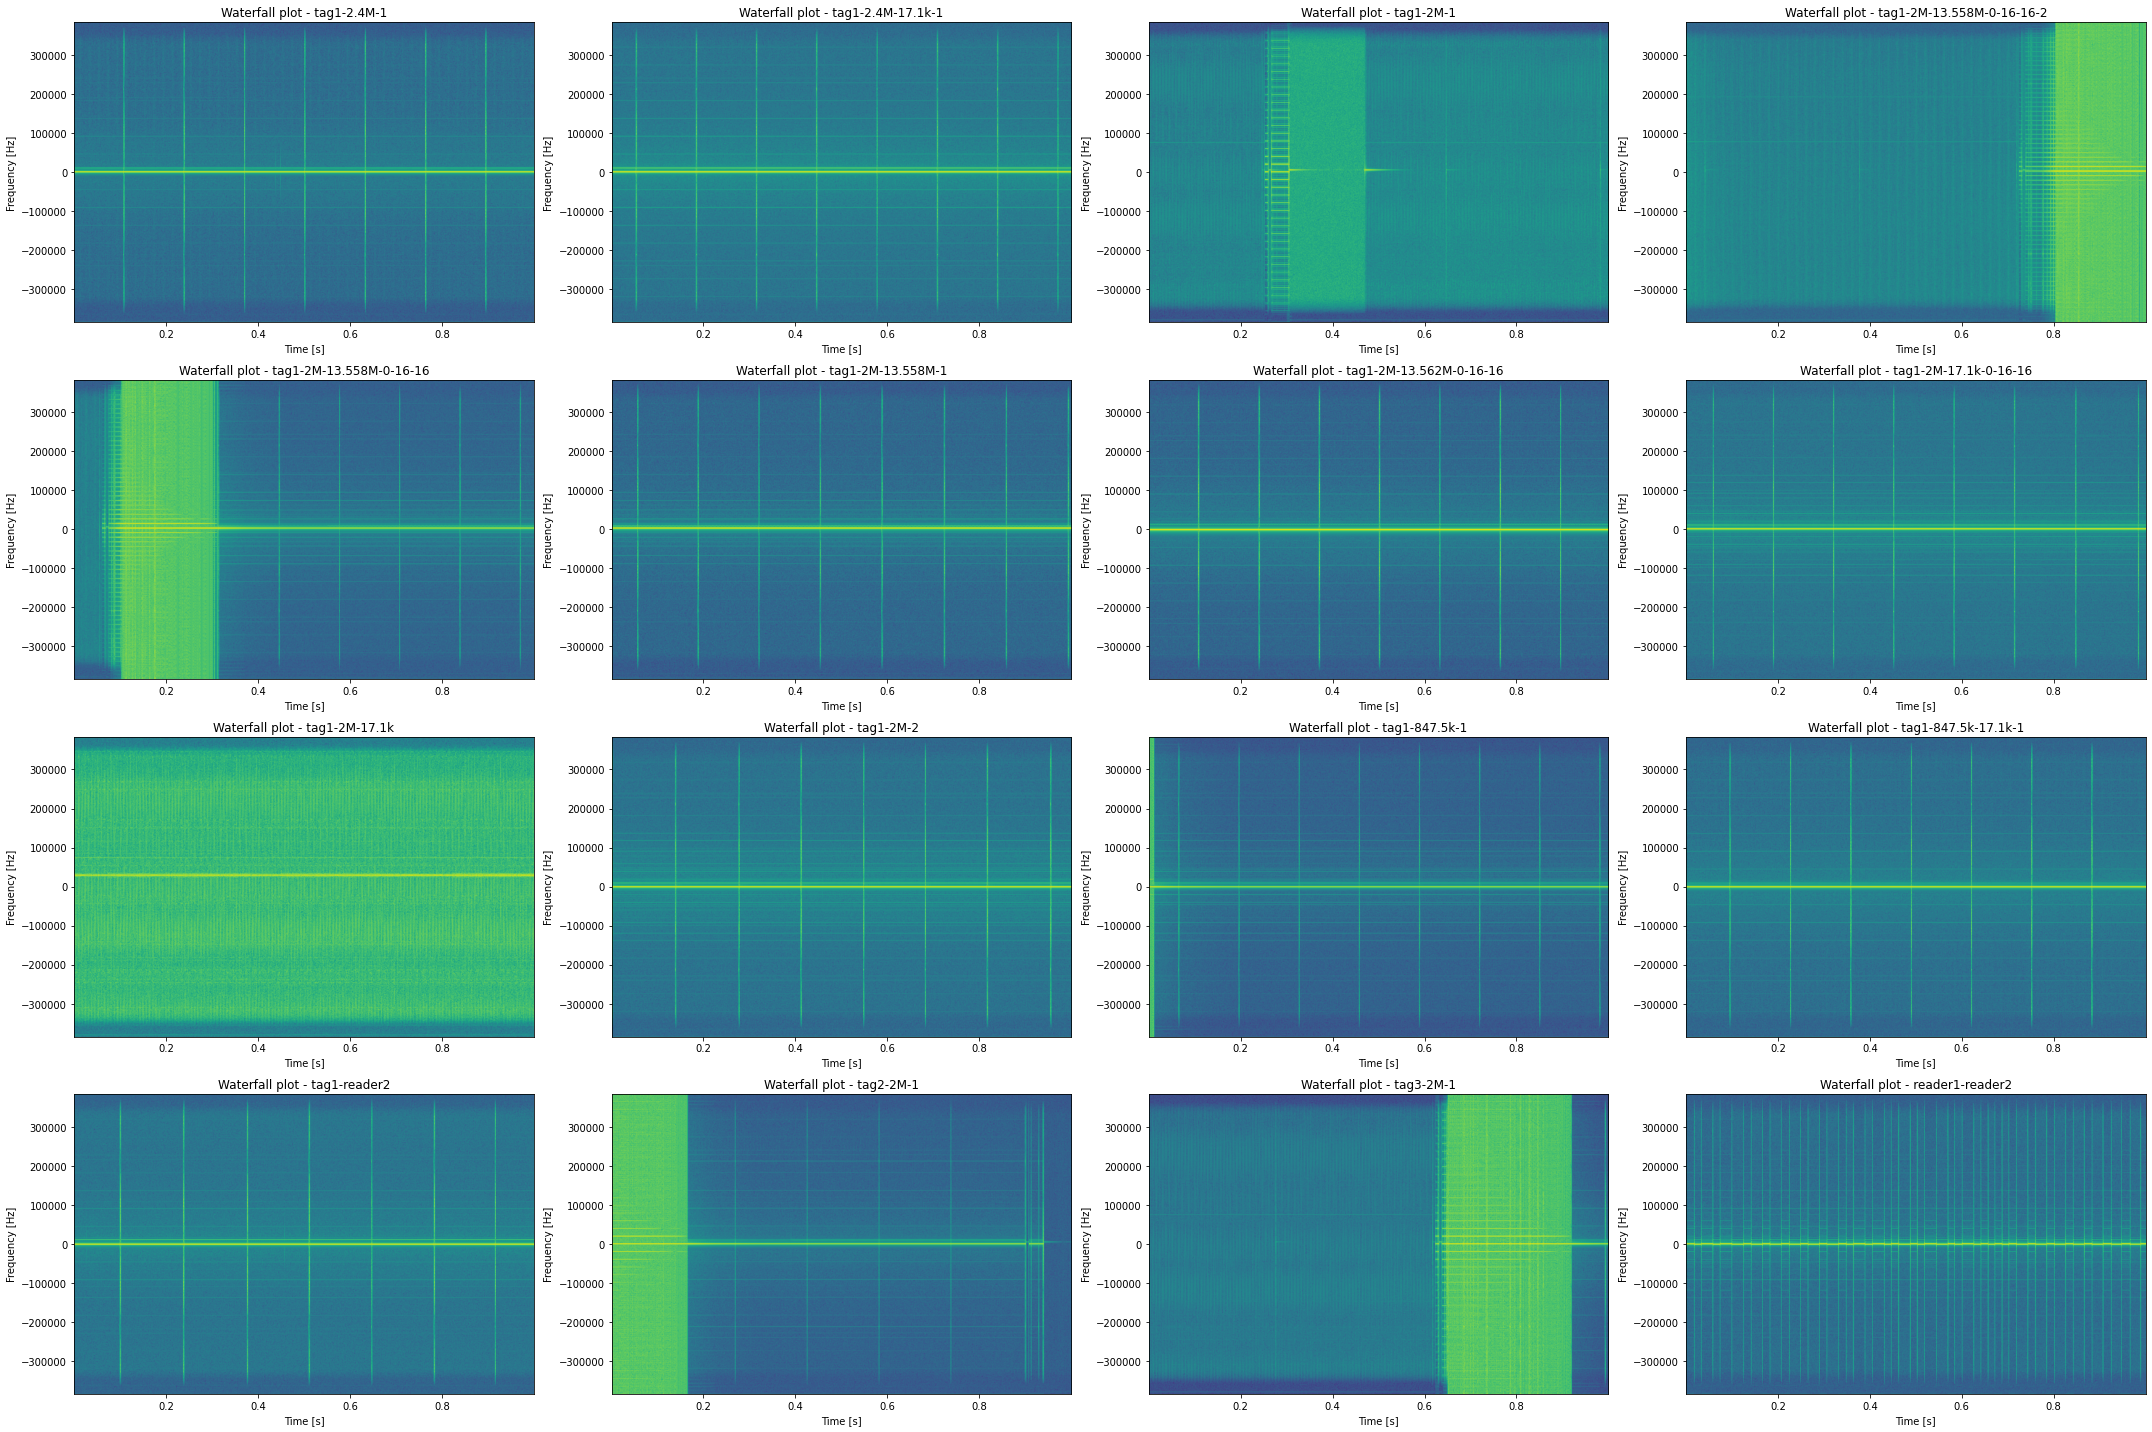

In [37]:
fig, axs = plt.subplots(4, 4, figsize=(30, 20))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.specgram(signal[1][int(3*samp_rate):int(4*samp_rate)], NFFT=nfft, Fs=samp_rate)
    ax.set_title("Waterfall plot - {}".format(signal[0]))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")

plt.tight_layout()
plt.show()

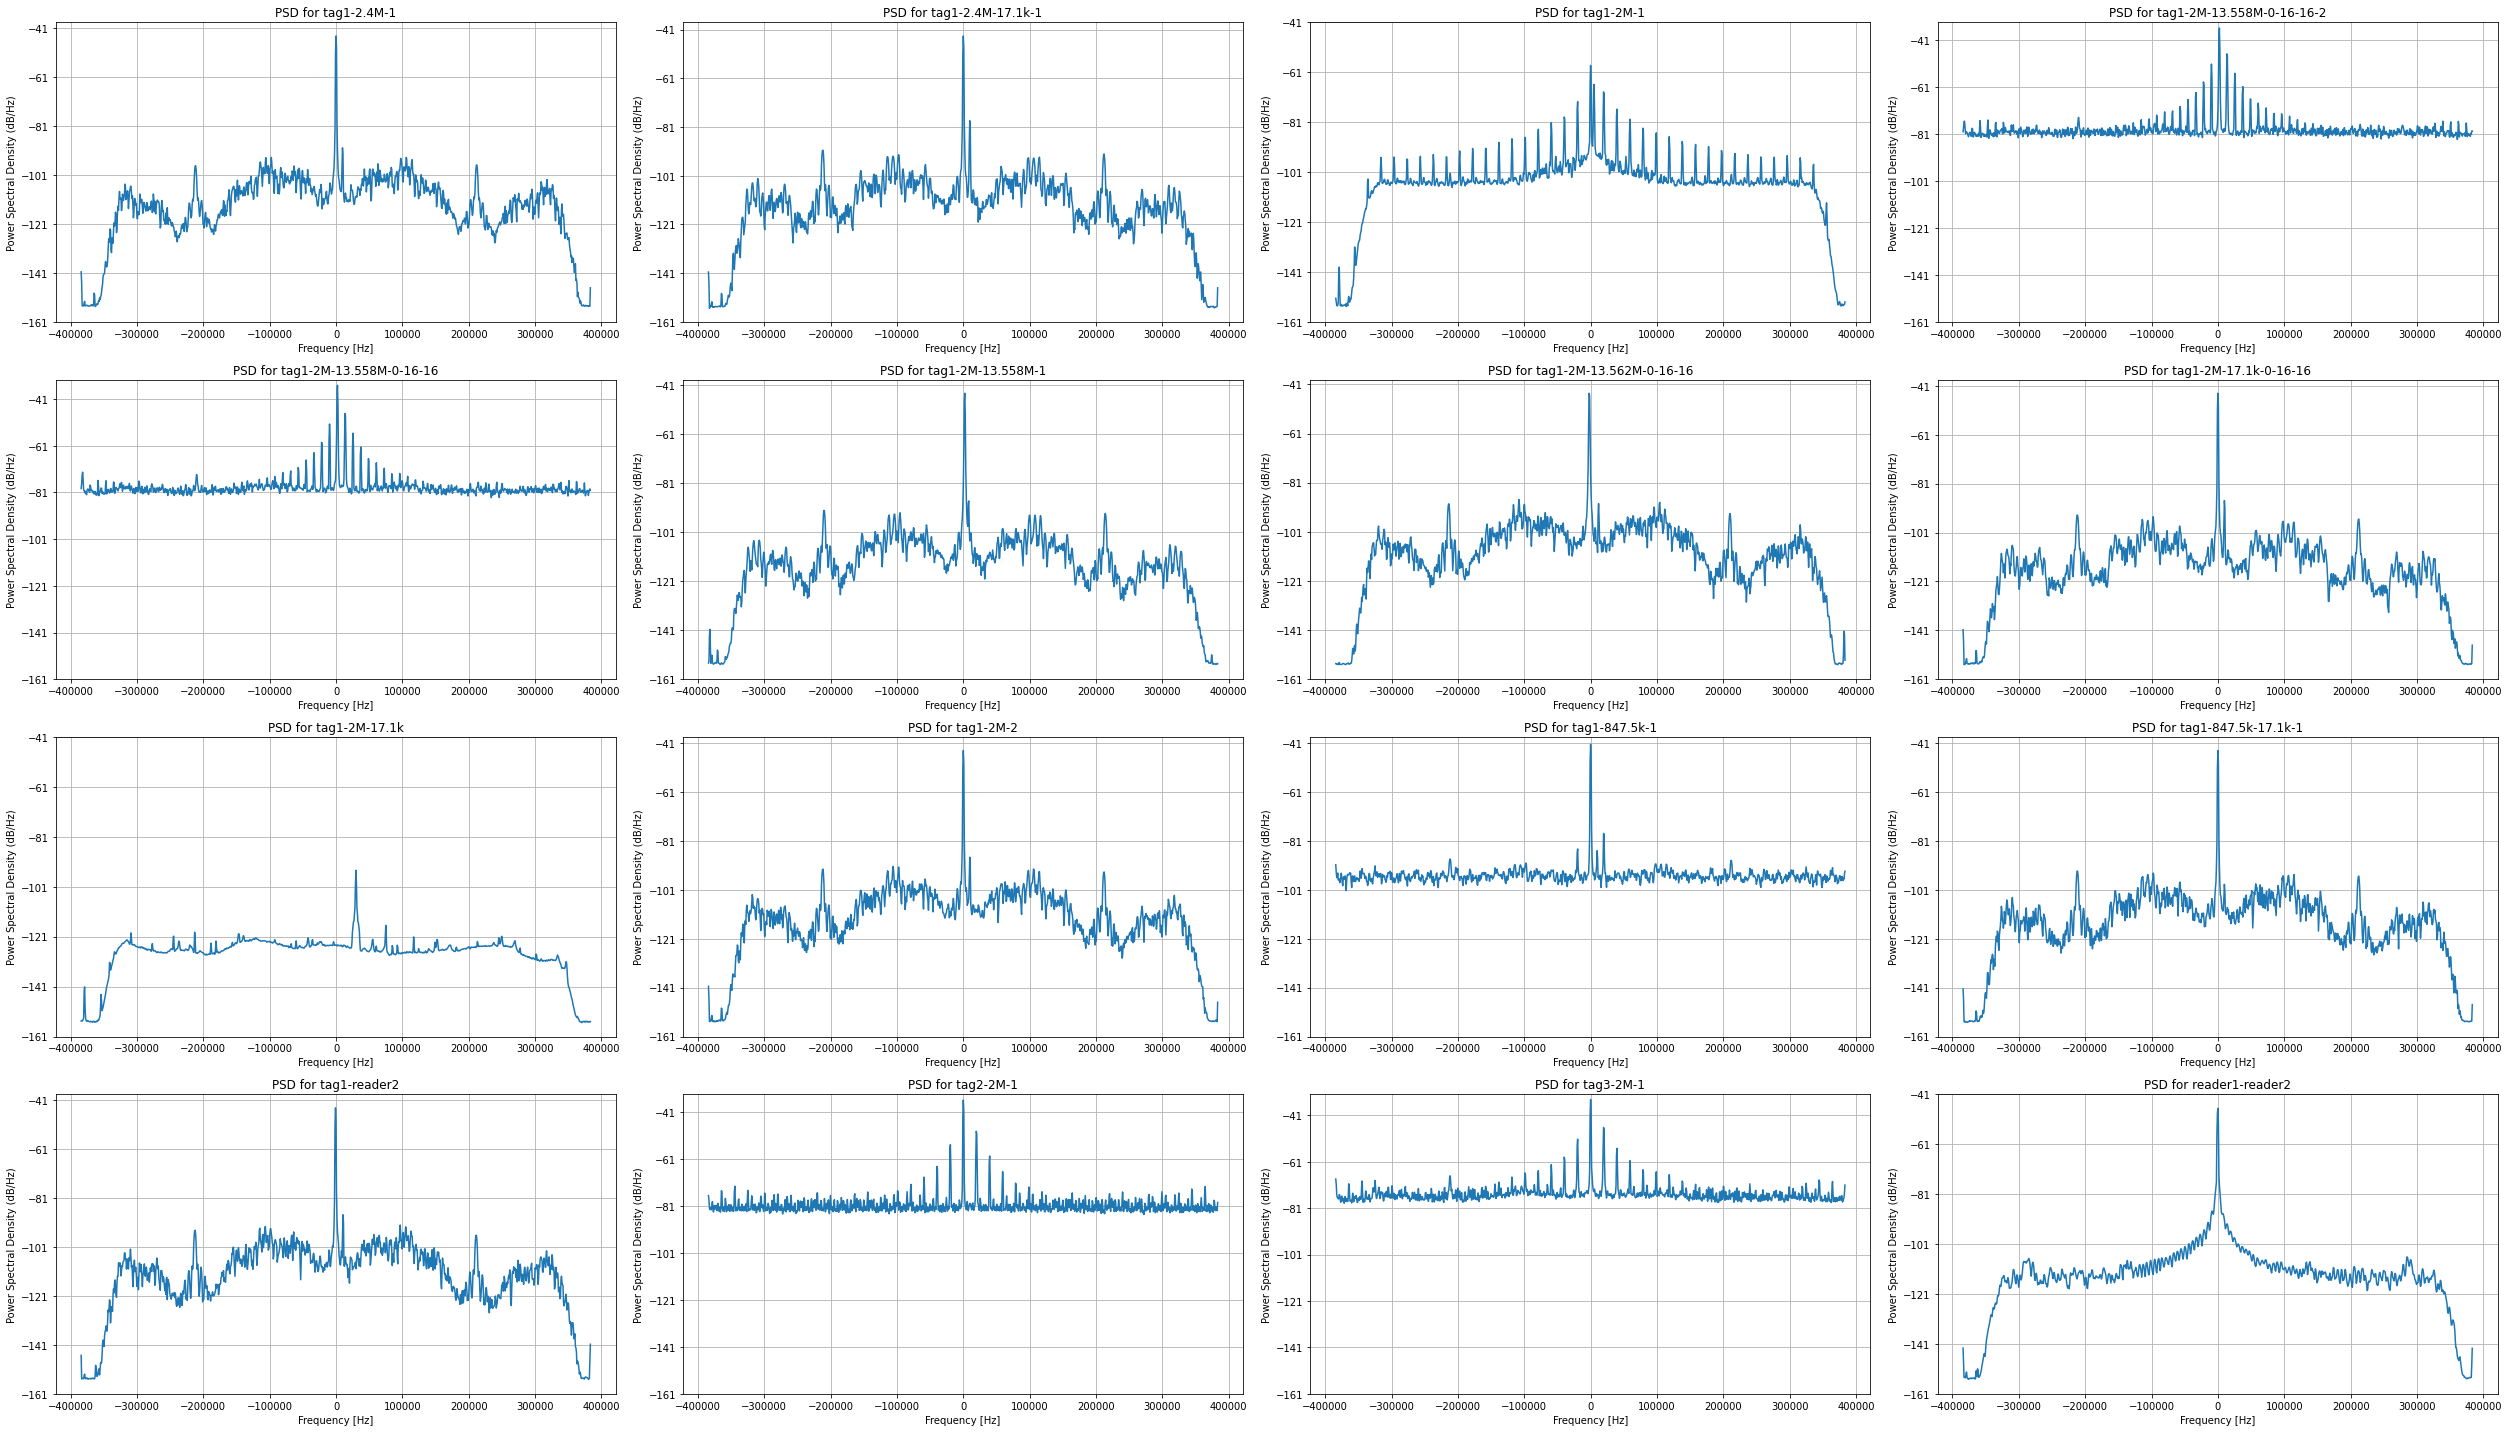

In [31]:
fig, axs = plt.subplots(4, 4, figsize=(30, 20))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.psd(signal[1][int(3*samp_rate):int(4*samp_rate)], NFFT=nfft, Fs=samp_rate)
    ax.set_yticks(range(-161, -21, 20))
    ax.set_xlabel("Frequency [Hz]")
    ax.set_title("PSD for {}".format(signal[0]))

plt.tight_layout()
plt.show()

---

## From Airspy HF+

In [6]:
datar = np.fromfile(os.path.join(PATH, "test-taoglas-AirspyHF+-2M.nfc"), dtype=scipy.complex64)
data1 = np.fromfile(os.path.join(PATH, "test-tag1.nfc"), dtype=scipy.complex64)
data2 = np.fromfile(os.path.join(PATH, "test-tag2.nfc"), dtype=scipy.complex64)
data3 = np.fromfile(os.path.join(PATH, "test-tag3.nfc"), dtype=scipy.complex64)

magnitudesr = shift_down(complex_to_mag(datar), 0.1)
magnitudes1 = complex_to_mag(data1)
magnitudes2 = complex_to_mag(data2)
magnitudes3 = complex_to_mag(data3)

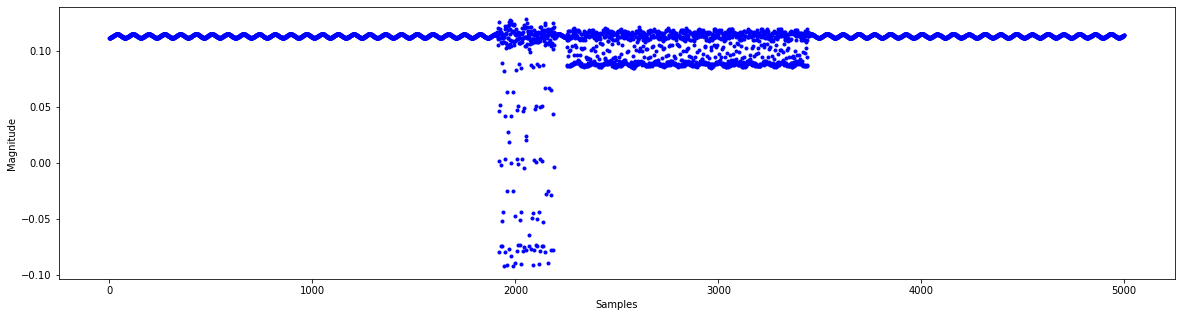

In [18]:
plt.plot(magnitudesr[int(3.095e6):int(3.1e6)], 'b.',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

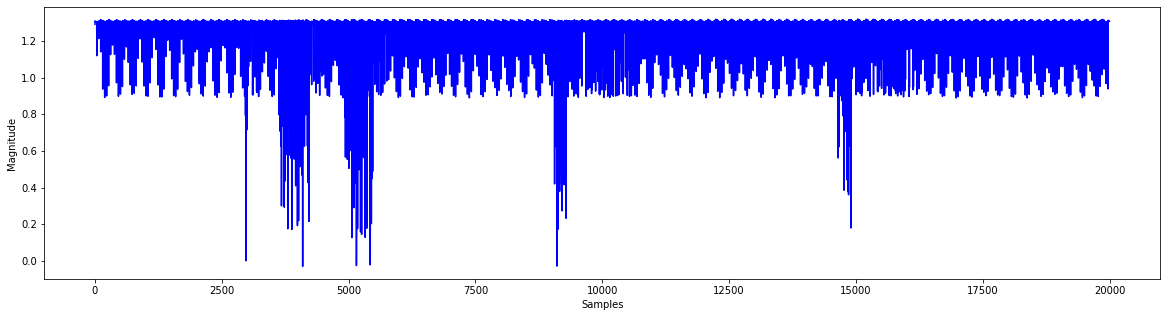

In [24]:
plt.plot(magnitudesr[int(2.73e6):int(2.75e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

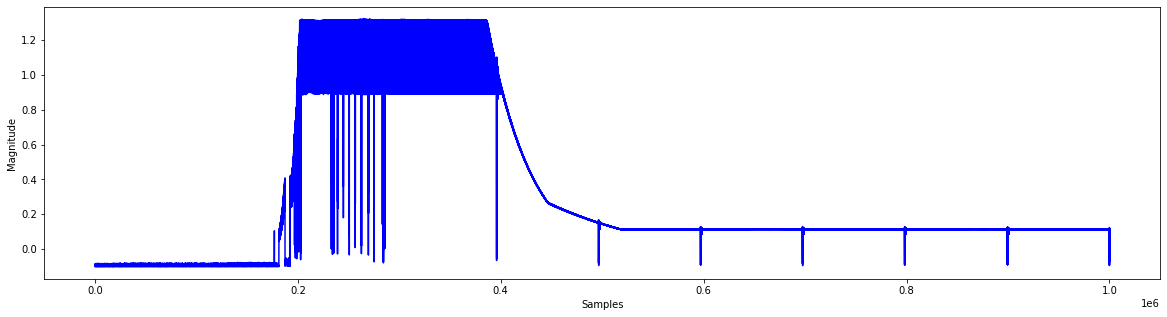

In [39]:
plt.plot(magnitudesr[int(2.5e6):int(3.5e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

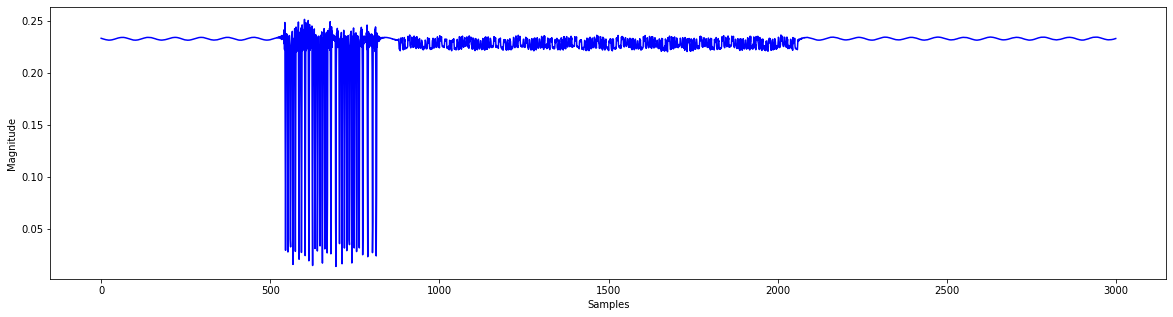

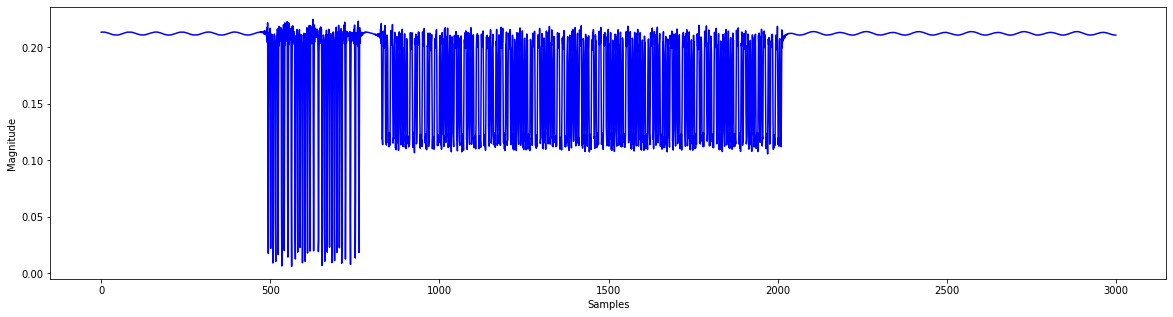

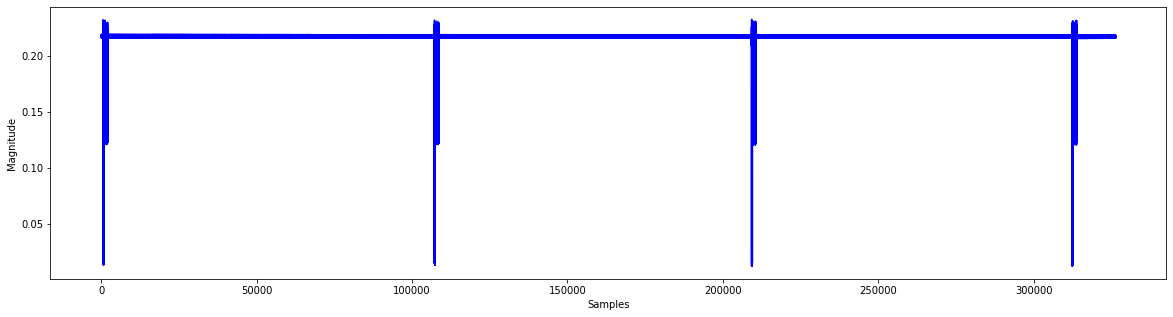

In [26]:
plt.plot(magnitudes3[int(3.58225e6):int(3.58525e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

plt.plot(magnitudes1[int(4.079e6):int(4.082e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

plt.plot(magnitudes2[int(3.9236e6):int(4.25e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

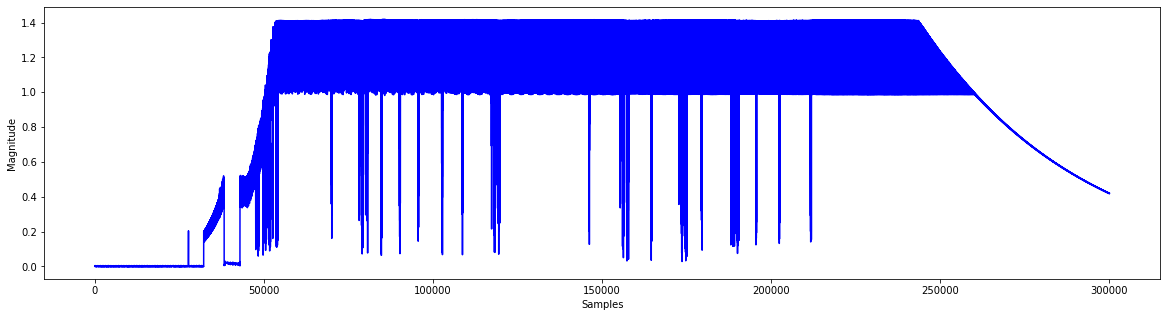

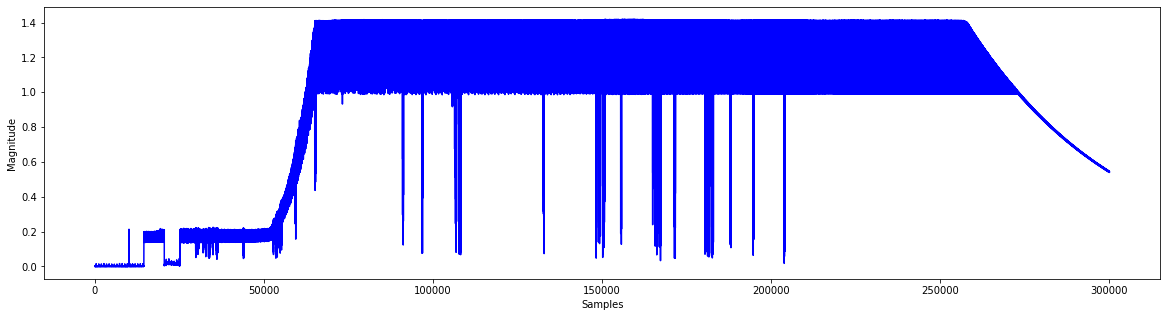

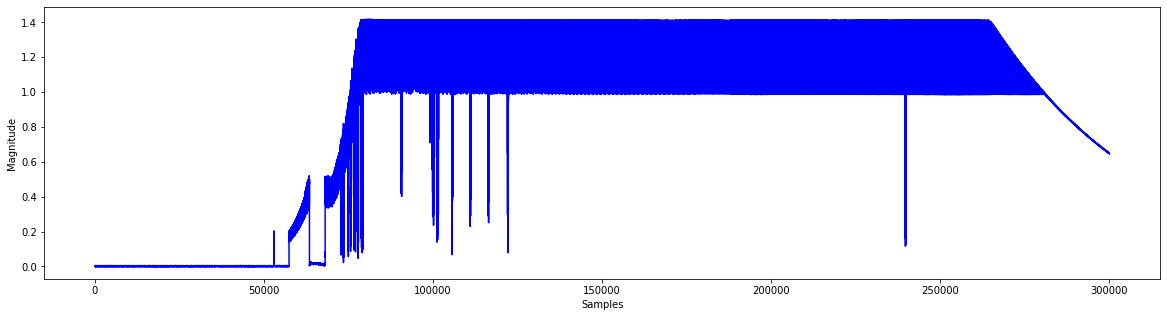

In [8]:
plt.plot(magnitudes3[int(2.75e6):int(3.05e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

plt.plot(magnitudes1[int(3.57e6):int(3.87e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

plt.plot(magnitudes2[int(2.15e6):int(2.45e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

## Continuous wavelet transform

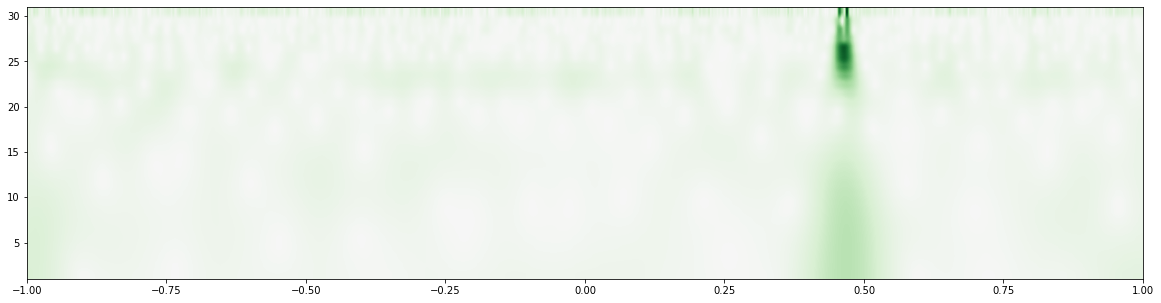

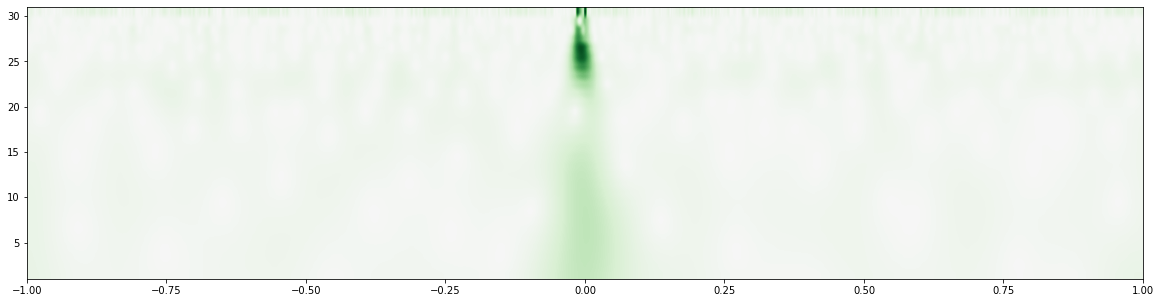

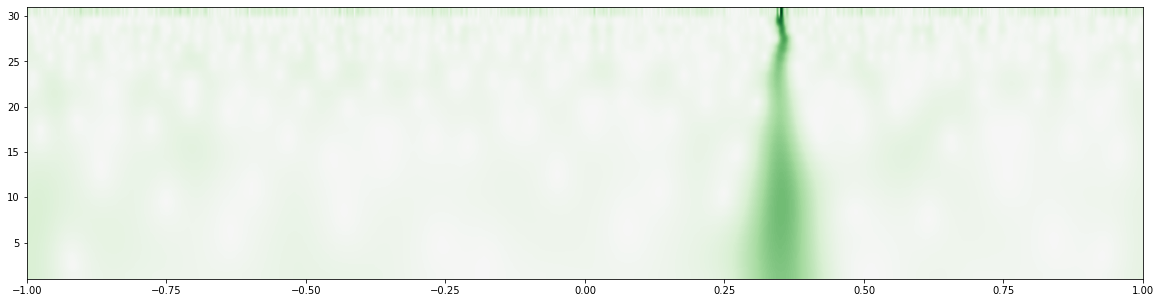

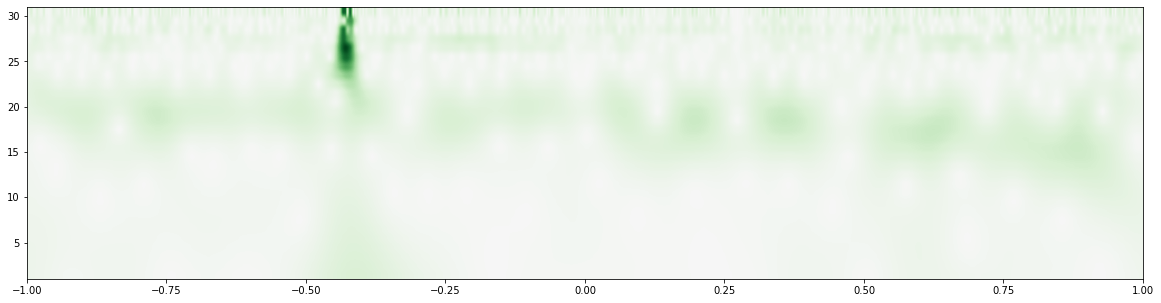

In [41]:
widths = np.arange(1, 31)
cwt = sig.cwt(np.real(signals[0][1][0:int(1000)]), sig.morlet2, widths)
plt.imshow(abs(cwt), extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwt).max(), vmin=-abs(cwt).max())
plt.show()

widths = np.arange(1, 31)
cwt = sig.cwt(np.real(signals[1][1][0:int(1000)]), sig.morlet2, widths)
plt.imshow(abs(cwt), extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwt).max(), vmin=-abs(cwt).max())
plt.show()

widths = np.arange(1, 31)
cwt = sig.cwt(np.real(signals[2][1][0:int(1000)]), sig.morlet2, widths)
plt.imshow(abs(cwt), extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwt).max(), vmin=-abs(cwt).max())
plt.show()

widths = np.arange(1, 31)
cwt = sig.cwt(np.real(signals[3][1][0:int(1000)]), sig.morlet2, widths)
plt.imshow(abs(cwt), extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwt).max(), vmin=-abs(cwt).max())
plt.show()